## Цель проекта
Учитывая исторические данные по выданным кредитам с информацией о том, допустил ли заемщик дефолт, можем ли мы построить модель, которая может предсказать, вернет ли заемщик свой кредит или нет? 

Таким образом, в будущем, когда у нас появится новый потенциальный клиент, мы сможем оценить, будет ли он возвращать кредит. 


Столбец "loan_status" содержит метку.

### Данные

In [1]:
# описание колонок

import pandas as pd

data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

print(data_info.loc['revol_util']['Description'])

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
data_info

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


### Загрузка и импорт

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('clear_dataset_lending_club.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            395219 non-null  int64  
 1   loan_amnt             395219 non-null  float64
 2   term                  395219 non-null  object 
 3   int_rate              395219 non-null  float64
 4   installment           395219 non-null  float64
 5   grade                 395219 non-null  object 
 6   sub_grade             395219 non-null  object 
 7   home_ownership        395219 non-null  object 
 8   annual_inc            395219 non-null  float64
 9   verification_status   395219 non-null  object 
 10  issue_d               395219 non-null  object 
 11  loan_status           395219 non-null  object 
 12  purpose               395219 non-null  object 
 13  dti                   395219 non-null  float64
 14  earliest_cr_line      395219 non-null  object 
 15  

In [5]:
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
395215,396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
395216,396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
395217,396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


### Задание

## Часть №1: разведочный анализ
    высните, сбалансирован ли набор данных

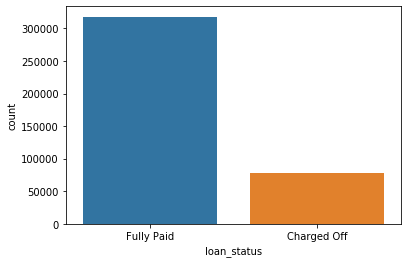

In [6]:
sns.countplot(df['loan_status'])

визуализируйте корреляции в данных

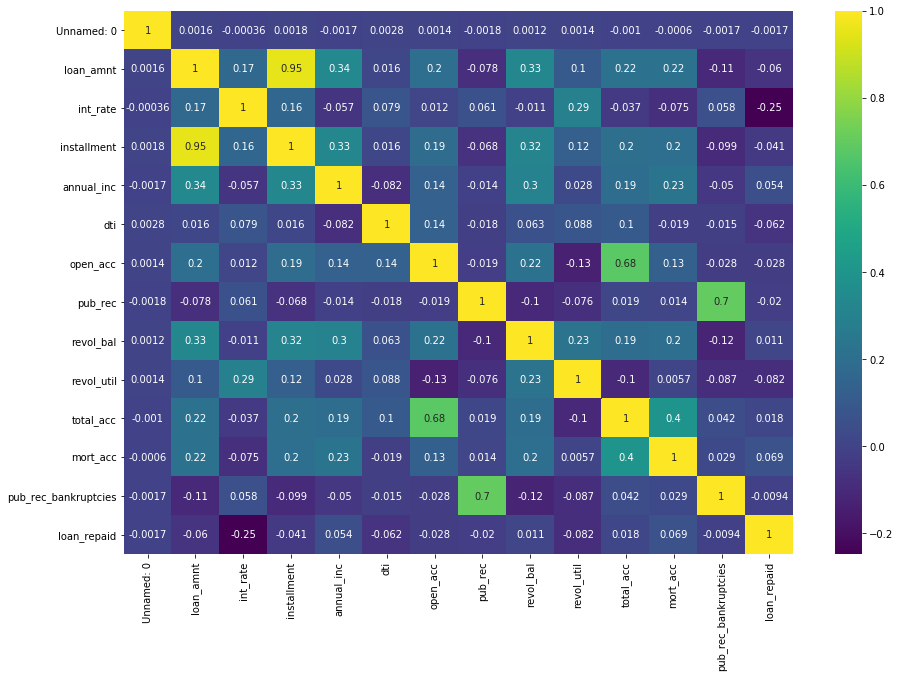

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap="viridis")

постройте box-plot для визуализации связи между loan_status и Loan Amount.

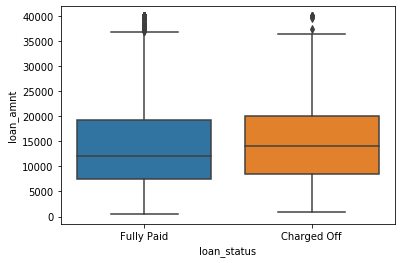

In [8]:
sns.boxplot('loan_status', 'loan_amnt', data = df)

## Часть №2: Предобработка данных
    Цель: 
    Удалите ненужные или повторяющиеся признаки. 
    Преобразуйте категориальные строковые признаки в фиктивные переменные

Найдите все категориальные признаки


In [9]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Рассмотрите каждый из признаков отдельно.**

---


### term feature

** Преобразуйте в числовой формат **

In [10]:
def get_part(x):
    if (x!=None and x!=np.nan):
        return x.split(' ')[1]


df['term'] = df['term'].apply(get_part)
df['term'] = df['term'].apply(pd.to_numeric)

In [11]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**Удалите из датасета этот признак**

In [12]:
df = df.drop('grade', axis=1)

**Преобразуйте признак sub_grade в набор фиктивных признаков (dummy variables). Затем включите колонки в общий датасет. Удалите исходные признаки и обратите внимание на использование ключа drop_first=True в методе  get_dummies .**

In [13]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True, dtype=np.int64)
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
395215,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
395216,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = df.merge(subgrade_dummies, left_index=True, right_index=True)

In [15]:
df = df.drop(columns='sub_grade', axis=1)

In [16]:
# оставшиеся категориальные признаки
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Для признаков verification_status, application_type, initial_list_status, purpose 
**Преобразуйте их в фиктивные признаки, используя такой же подход как для признака subgrade **

In [18]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True, dtype=np.int64)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

### home_ownership
** Изучите значения признака.**

In [21]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Замените значения NONE и ANY на OTHER. После этого преобразуйте признак в фиктивные переменные.**
см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

In [22]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [23]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True, dtype=np.int64)
df = df.merge(home_ownership_dummies, left_index=True, right_index=True)
df = df.drop(columns='home_ownership', axis=1)

### признак address
**TASK: Извлеките значение zip code и создайте на его основе новый столбец 'zip_code'.**

In [24]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [25]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

**Теперь преобразуйте zip_code в фиктивные переменные; удалите лишние столбцы (zip_code, address) из датасета и добавьте новые фиктивные переменные**

In [26]:
zip_code_dummies = pd.get_dummies(df['zip_code'], drop_first=True, dtype=np.int64)
df = df.merge(zip_code_dummies, left_index=True, right_index=True)
df = df.drop(columns=['zip_code', 'address'], axis=1)

### issue_d 

** Этот столбец нужно удалить! Попробуйте, объяснить почему, проанализировав его. **

In [27]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Aug-2007        1
Nov-2007        1
Name: issue_d, Length: 112, dtype: int64

In [28]:
# месяц-год выдачи кредита - вряд ли такой параметр можно использовать как фичу,
# т.к. мы предсказываем, будет кредит выдан или нет, дата выдачи для этого неактуальна
df = df.drop('issue_d', axis=1)

### earliest_cr_line
** преобразуйте год в числовой формат (int)**

In [29]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda earliest_cr_line:earliest_cr_line[-4:])
df['earliest_cr_line'] = pd.to_numeric(df['earliest_cr_line'])

In [30]:
# ожидаемый результат в конце этой части:
# после вызова df.select_dtypes(['object']).columns
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [31]:
# loan_status -- целевая переменная, но она совпадает с loan_repaid
# поэтому ее тоже надо удалить
# мы будем предсказывать loan_repaid
# также остался ненужный столбец Unnamed: 0
df = df.drop(columns=['loan_status', 'Unnamed: 0'], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

## Часть №3: подготовка данных к обучению

используйте функцию train_test_split из sklearn для разделения данных 

In [33]:
from sklearn.model_selection import train_test_split

** Создайте переменные X и y для данных о признаках и метках**

In [34]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

**Выполните разделение данных test_size=0.2 и random_state=42**

результат: 4 переменных
X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Нормализация данных

**Используйте MinMaxScaler для нормализации значений признаков в X_train и X_test. Объясните, почему для максимума и минимума можно использовать только X_train**

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# для нормализации не используем тестовые данные, только обучающие, иначе будет "утечка данных"
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Моделирование


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

**Определите модель (model = Sequential()) с 2 скрытыми слоями и убывающим числом нейронов в каждом следующем слое. Не забудьте про входной и выходной слои (объясните каков должен быть их размер). Добавьте отключение ([Dropout](https://keras.io/layers/core/)).**

In [39]:
# входной слой
model = Sequential()

model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))

# скрытый слой
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.2))

# скрытый слой 2
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))

# выходной слой
model.add(Dense(1, activation="sigmoid"))

# Не забудьте скомпилировать, указав loss и optimizer
model.compile(loss="binary_crossentropy", optimizer="adam")

**Тренируйте модель 25 эпох. Используйте X_test, y_test в качестве валидационной выборки. Самостоятельно выберите размер батча**

In [40]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3724 - val_loss: 0.2625
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2699 - val_loss: 0.2605
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2653 - val_loss: 0.2600
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2638 - val_loss: 0.2599
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2626 - val_loss: 0.2595
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2614 - val_loss: 0.2595
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2603 - val_loss: 0.2598
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2588
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2605 - val_loss: 0.2591
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.260

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2370      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

**Сохраните модель**

In [42]:
model.save('Keras-Exercise-model')

INFO:tensorflow:Assets written to: Keras-Exercise-model\assets


In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('Keras-Exercise-model')

## Часть №4: Оценка модели
постройте кривые потерь

In [45]:
history.history

{'loss': [0.3091925084590912,
  0.26879140734672546,
  0.2650182247161865,
  0.2633751332759857,
  0.26247698068618774,
  0.26192229986190796,
  0.26150763034820557,
  0.26110348105430603,
  0.26072317361831665,
  0.2605430483818054,
  0.26005756855010986,
  0.26007768511772156,
  0.2592672109603882,
  0.25940442085266113,
  0.2592118978500366,
  0.25899022817611694,
  0.25883325934410095,
  0.2587030529975891,
  0.25855574011802673,
  0.25829043984413147,
  0.2581947445869446,
  0.258156418800354,
  0.25787344574928284,
  0.2578023076057434,
  0.2572821080684662],
 'val_loss': [0.2624991834163666,
  0.2605038285255432,
  0.25997379422187805,
  0.2599089741706848,
  0.2595060467720032,
  0.25948432087898254,
  0.25982165336608887,
  0.2588319480419159,
  0.25910472869873047,
  0.2588598430156708,
  0.25876379013061523,
  0.25870281457901,
  0.2584437131881714,
  0.2584124803543091,
  0.25859010219573975,
  0.2583368122577667,
  0.2587049603462219,
  0.2582339942455292,
  0.258597552776

In [46]:
losses = pd.DataFrame(history.history)
losses

,loss,val_loss
0,0.309193,0.262499
1,0.268791,0.260504
2,0.265018,0.259974
3,0.263375,0.259909
4,0.262477,0.259506
5,0.261922,0.259484
6,0.261508,0.259822
7,0.261103,0.258832
8,0.260723,0.259105
9,0.260543,0.258860


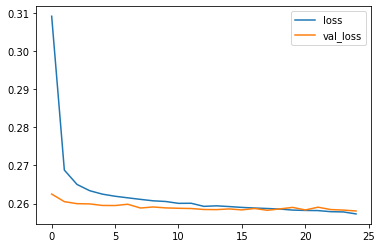

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

**Выполните предсказание на  X_test и отобразите отчет и матрицу ошибок для X_test**

In [48]:
pred = model.predict_classes(X_test)

C:\Users\Mark.Voytov\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test, pred))

[[ 6768  8653]
 [  118 63505]]


In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**выберите 1 случайную запись из набора df **
Затем удалите из нее  аттрибут loan_repaid

In [52]:
new_customer = df.sample(n=1)
new_customer = new_customer.drop('loan_repaid',axis=1)
new_customer

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
65014,12000.0,36,10.99,392.81,68000.0,15.44,1991,7.0,0.0,21521.0,...,1,0,0,0,0,1,0,0,0,0


In [168]:
# предскажите для new_customer его класс (model.predict_classes(...))
# обратите внимание на форму входных данных

In [53]:
model.predict_classes(new_customer)

C:\Users\Mark.Voytov\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

**сравните с реальной меткой из датасета df**

In [54]:
df.loc[new_customer.index[0], 'loan_repaid']

1